## 一、Rule Based

###  1.分析

In [2]:
hello_rules = '''
say_hello = names hello tail 
names = name names | name
name = Jhon | Mike | 老梁 | 老刘 
hello = 你好 | 您来啦 | 快请进
tail = 呀 | ！
'''
#statement、expression

In [3]:
rules = {}

In [4]:
equal_split = '='
or_split = '|'

for line in hello_rules.split('\n'):
    #split时第一行和末尾行为空
    if not line:
        continue
        
    stmt, expr = line.split(equal_split)
    expr = expr.split(or_split)
    print(stmt, expr)
    
    rules[stmt.strip()] = expr

say_hello  [' names hello tail ']
names  [' name names ', ' name']
name  [' Jhon ', ' Mike ', ' 老梁 ', ' 老刘 ']
hello  [' 你好 ', ' 您来啦 ', ' 快请进']
tail  [' 呀 ', ' ！']


In [5]:
rules['name']

[' Jhon ', ' Mike ', ' 老梁 ', ' 老刘 ']

In [6]:
rules

{'say_hello': [' names hello tail '],
 'names': [' name names ', ' name'],
 'name': [' Jhon ', ' Mike ', ' 老梁 ', ' 老刘 '],
 'hello': [' 你好 ', ' 您来啦 ', ' 快请进'],
 'tail': [' 呀 ', ' ！']}

In [7]:
import random

In [8]:
def generate(grammer_rule, target):
    if target in grammer_rule:
        condidates = grammer_rule[target]
        condidate = random.choice(condidates)
        return " ".join(generate(grammer_rule, target=c.strip()) for c in condidate.split())
    else:
        return target

In [31]:
generate(rules, 'say_hello')

'Jhon 快请进 呀'

###   2.封装

In [38]:
def get_generation_by_gram(grammar_str, target, equal_split='=', or_split='|'):
    rules = dict() # key is the @statement, value is @expression
    for line in grammar_str.split('\n'):
        if not line:
            continue
            
        stmt, expr = line.split(equal_split)
        rules[stmt.strip()] = expr.split(or_split)
    
    generated = generate(rules, target=target)
    
    return generated

In [34]:
def generate(grammar_rule, target):
    if target in grammar_rule: 
        candidates = grammar_rule[target] 
        candidate = random.choice(candidates) 
        return ''.join(generate(grammar_rule, target=c.strip()) for c in candidate.split())
    else:
        return target

In [41]:
get_generation_by_gram(hello_rules, 'say_hello')

'老刘Jhon老刘老刘你好！'

   ### 3.修改配置文件调用1

In [51]:
simple_grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article => ⼀个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | ⼩小的
"""

In [55]:
get_generation_by_gram(simple_grammar, target='sentence', equal_split='=>', or_split='|')

'⼀个好看的好看的桌子坐在⼀个蓝色的好看的蓝色的桌子'

### 4.修改配置文件调用2 (Data Driven)

In [63]:
simpel_programming = '''
if_stmt => if ( cond ) { stmt }
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  char var | char
char => a | b |  c | d | 0 | 1 | 2 | 3
'''

In [69]:
for i in range(20):
    print(get_generation_by_gram(simpel_programming, 'if_stmt', equal_split='=>', or_split='|'))

if(a0<a3){if(b2d3a<a){d1=2}}
if(0a){3c=2d}
if(3<a){d=3bc303d312}
if(2ba01){if(c==c1){if(a2==3){3=d}}}
if(acd303b){if(01){if(2dc30ad==1){if(a<13){2=0d}}}}
if(30d>=12){3d32dd=3a3aa}
if(2==2){3=aca}
if(c==1){if(3b3d){if(1c<=a){if(d0<c){if(db<=2a3){d=a}}}}}
if(d2b<=3){if(3==1d3){if(ddacc){if(21>=b){if(0<bb){if(1b2d==0){01=d}}}}}}
if(aa==d){0=0}
if(3<=c){if(3<33bd){if(23<=a){2=2}}}
if(c3a){if(3c<1ba){c=3}}
if(3<=d){if(3==0){if(bd<=1c){1ab=1}}}
if(d1>=0){if(c<=ab1){3=32}}
if(310){if(2<0){3=b}}
if(a==ba){if(a<=c){20=3}}
if(1bc0c3){d=1b}
if(02<=bd0b){if(02<3){0a1=b}}
if(c==b){1=aa3c}
if(bb){if(1>=23){if(c<a3){if(ab>=02c){aa3=1}}}}


## 二、Probability Based

### Language Lodel


#### input:Sentence(w1...wn)
####  output:Probability(0-1)
#####                   2-Gram


 $$ Pr(sentence) = Pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i, w_{i+1})}{count(w_i)}$$

### 1.数据导入

In [1]:
corpus = 'D:/AI/NLP课程/作业/Lesson1/article_9k.txt'  

In [2]:
with open(corpus, 'r', encoding='UTF-8') as f:
    FILE = f.read()
    
FILE[:3000]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息\n骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台\n此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄大屏旗舰的设定有关按照目前掌握的资料一加手机5拥有55寸1080P三星AMOLED显示屏6G8GBRAM64GB128GBROM双1600万摄像头备货量惊喜根据京东泄露的信息一加5起售价是xx99元应该是在279928992999中的某个\n这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车新华社记者张立云摄\n原标题44岁女子跑深圳约会网友被拒暴雨中裸身奔走深圳交警微博称昨日清晨交警发现有一女子赤裸上身行走在南坪快速上期间还起了轻生年头一辅警发现后赶紧为其披上黄衣并一路劝说她那么事发时到底都发生了些什么呢南都记者带您一起还原现场南都记者在龙岗大队坂田中队见到了辅警刘青发现女生的辅警一位外表高大帅气说话略带些腼腆的90后青年刘青介绍6月16日早上7时36分他正在环城南路附近值勤接到中队关于一位女子裸身进入机动车可能有危险的警情随后骑着小铁骑开始沿路寻找大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子女子身上一丝不挂地逆车流而行时走时停时坐时躺险象环生刘青停好小铁骑和另外一名巡防员追了上去发现女子的情绪很低落话不多刘青尝试和女子交流劝说女子离开可女

In [4]:
import jieba

In [5]:
max_length = 1000000
sub_file = FILE[:max_length]

In [6]:
def cut(ex_string):
    return list(jieba.cut(ex_string))

In [7]:
TOKENS = cut(sub_file)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ligy14\AppData\Local\Temp\jieba.cache
Loading model cost 0.619 seconds.
Prefix dict has been built succesfully.


In [9]:
len(TOKENS)

532454

### 2.数据可视

In [115]:
from collections import Counter

In [137]:
%matplotlib inline
# 由于 %matplotlib inline 的存在，当输入plt.plot(xxx)后，不必再输入 plt.show()，图像将自动显示出来

In [129]:
words_count = Counter(TOKENS)

In [130]:
words_count.most_common(10)

[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960)]

In [132]:
words_with_fre = [f for w, f in words_count.most_common()]

In [141]:
# print(words_with_fre)

In [133]:
import matplotlib.pyplot as plt

In [134]:
words_with_fre[:10]

[28764, 7563, 6529, 4883, 4245, 2531, 2433, 2374, 2114, 1960]

In [135]:
import numpy as np

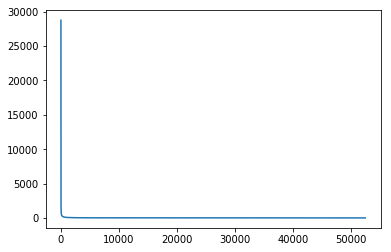

In [138]:
plt.plot(words_with_fre)

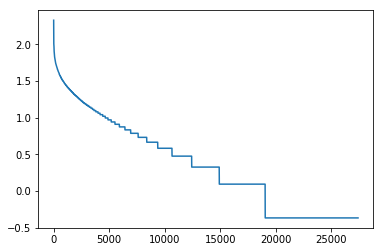

In [146]:
plt.plot(np.log(np.log(words_with_fre)))

#### 在大量的文本中，出现次数第二多的单词，它出现的概率是出现频率最高的单词的 1/2,
#### 出现频率第三高的单词，频率是最高的单词的 1/3，
#### 类似地，第1000 => 1/1000


### 3.1搭建模型 

 $$ Pr(sentence) = Pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i, w_{i+1})}{count(w_{i+1})}$$ 分母是(i+1)

In [205]:
words_count.most_common()[-1][-1]

1

In [206]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [207]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [227]:
_2_gram_word_counts = Counter(_2_gram_words)
_2_gram_word_counts.most_common(10)
_2_gram_word_counts.most_common()[-1]
# _2_gram_word_counters['此外自']
# words_count['自']

('飙涨至', 1)

In [211]:
def two_gram_model(sentence):
    tokens = cut(sentence)
    print(tokens)
    
    probability = 1
    
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        pro = _2_gram_word_counts[word + next_word] / words_count[next_word]
        #_2_gram_word_counters is dict
        
        probability *= pro
    
    return probability

In [213]:
two_gram_model("小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测")

['小米', '手机', '6', '等', '15', '款', '机型', '外', '其余', '机型', '已', '暂停', '更新', '发布', '含', '开发', '版', '体验版', '内测']


5.043024151085131e-32

### 3.2优化模型 

In [189]:
def get_1_gram_count(word):
    if word in words_count: 
        return words_count[word]
    else:
        return words_count.most_common()[-1][-1]

In [190]:
def get_2_gram_count(word):
    if word in _2_gram_word_counts: 
        return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]

In [191]:
def get_gram_count(word, wc):
    if word in wc: 
        return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [219]:
def two_gram_model(sentence):
    # 2-gram langauge model
    tokens = cut(sentence)
    print(tokens)
    
    probability = 1
    
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)
        _one_gram_c = get_gram_count(next_word, words_count)
        pro =  _two_gram_c / _one_gram_c
        
        probability *= pro
    
    return probability  

In [216]:
two_gram_model("小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测")

5.043024151085131e-32

In [220]:
two_gram_model("我真的服了")

['我', '真的', '服', '了']


2.983691144205771e-06